In [1]:
# importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import folium
from folium.plugins import HeatMap

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')   # loading the csv file
df = data.copy()

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
df.shape  # the dataset contains 48895 datapoints and 16 features

(48895, 16)

In [5]:
df.dtypes # checking the datatype of the whole dataset

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
df.columns  # columns which are present in our dataset

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df.isnull().sum()  # checking for null values in each feature if any

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df.describe() # getting the basic info from our dataset

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
df.drop(['id','name','host_name','last_review'],axis=1,inplace=True)   # dropping the columns which are not required 

In [10]:
df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [11]:
df.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
df.fillna({'reviews_per_month':0},inplace=True) # filling the missing values of reviews_per_month to 0 if any

In [13]:
df.shape

(48895, 12)

In [14]:
df = df[['host_id', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365','price']]

In [15]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,6,365,149
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355,225
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,0.00,1,365,150
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,4.64,1,194,89
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0,80


### Count of host_id

In [16]:
df['host_id'] = df['host_id'].astype(str)  # converting hostid from int into string

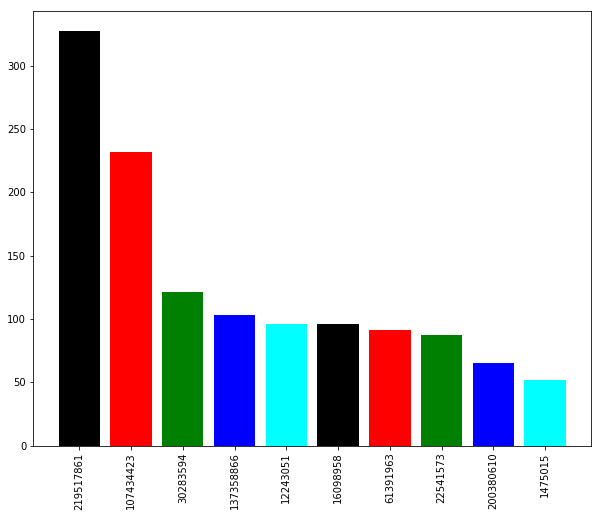

In [17]:
hostid = df.host_id.value_counts()[:10]
x = hostid.index
y = hostid.values
X = []
Y = []
for i in x:
    X.append(i)
for i in y:
    Y.append(i)
plt.figure(figsize=(10,8))    
plt.bar(X,Y,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(rotation  = 90)
plt.show()


### now we will find count of unique neighbourhood , neighbourhood_group and room type using countplot and then display how each of the feature is distributed using scatterplot. 

In [18]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

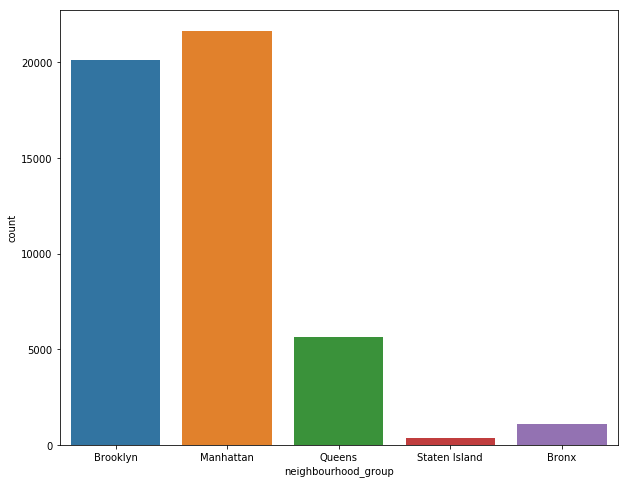

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(df['neighbourhood_group'])

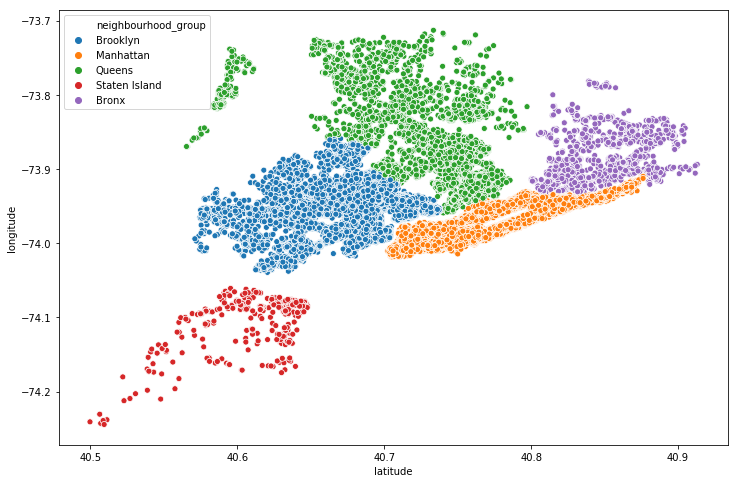

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['latitude'],df['longitude'],hue=df['neighbourhood_group'])

In [21]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

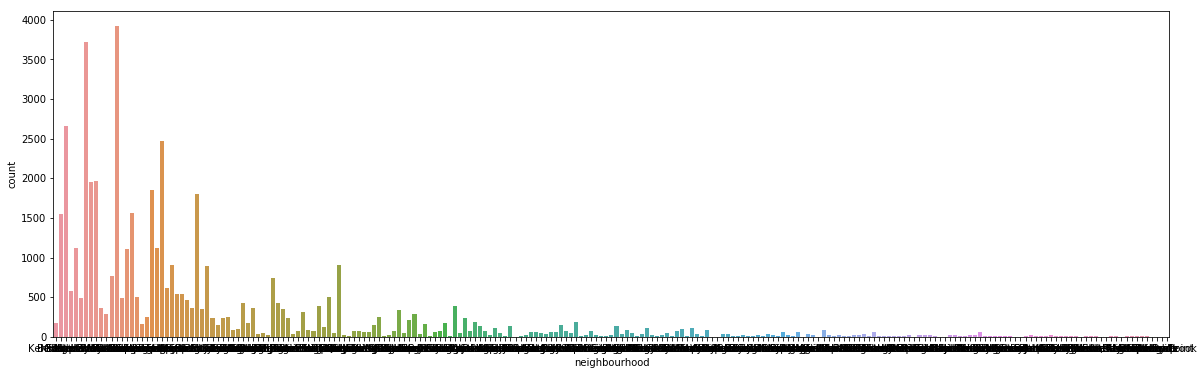

In [22]:
plt.figure(figsize=(20,6))
sns.countplot(df['neighbourhood'])

In [23]:
df['neighbourhood'].value_counts()

Williamsburg                  3920
Bedford-Stuyvesant            3714
Harlem                        2658
Bushwick                      2465
Upper West Side               1971
Hell's Kitchen                1958
East Village                  1853
Upper East Side               1798
Crown Heights                 1564
Midtown                       1545
East Harlem                   1117
Greenpoint                    1115
Chelsea                       1113
Lower East Side                911
Astoria                        900
Washington Heights             899
West Village                   768
Financial District             744
Flatbush                       621
Clinton Hill                   572
Long Island City               537
Prospect-Lefferts Gardens      535
Park Slope                     506
East Flatbush                  500
Fort Greene                    489
Murray Hill                    485
Kips Bay                       470
Flushing                       426
Ridgewood           

In [24]:
most_busy_neighbourhoods = df.neighbourhood.value_counts()[:10]
most_busy_neighbourhoods

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [25]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

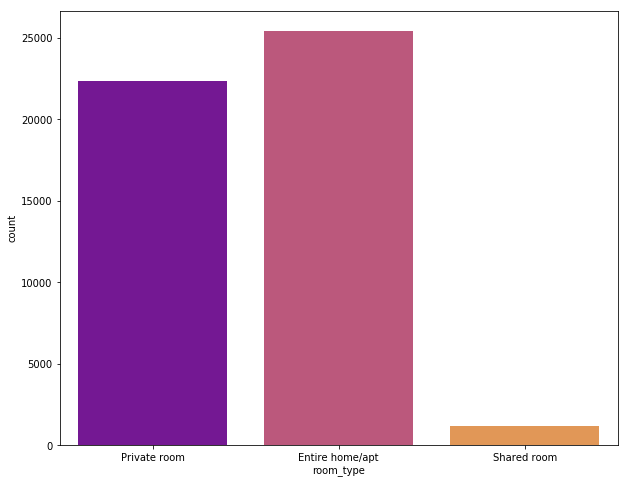

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(df['room_type'],palette='plasma')

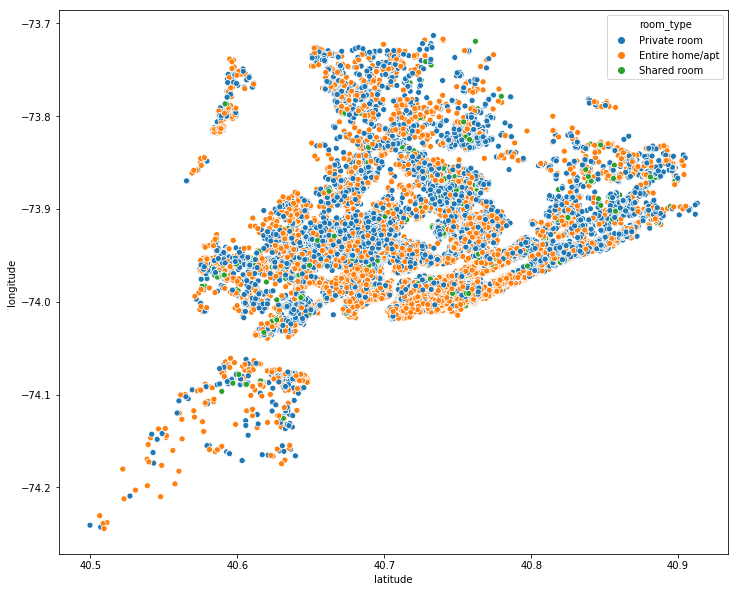

In [27]:
plt.figure(figsize=(12,10))
sns.scatterplot(df['latitude'],df['longitude'],hue=df['room_type'])

### people choosing the neighbourhood group based on the availability of the rooms

In [28]:
a = df.groupby(by='neighbourhood_group').sum()

In [29]:
a

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
neighbourhood_group,,,,,,,,
Bronx,44565.50071,-8.060805e+04,4976,28371,1609.94,2437,180843,95459
Brooklyn,817931.96821,-1.486715e+06,121761,486574,21104.98,45925,2015070,2500600
Manhattan,883012.01680,-1.602364e+06,185833,454569,21158.08,277073,2425586,4264527
Queens,230784.85597,-4.185631e+05,29358,156950,8879.05,23005,818464,563867
Staten Island,15147.61383,-2.764147e+04,1802,11541,587.99,865,74480,42825


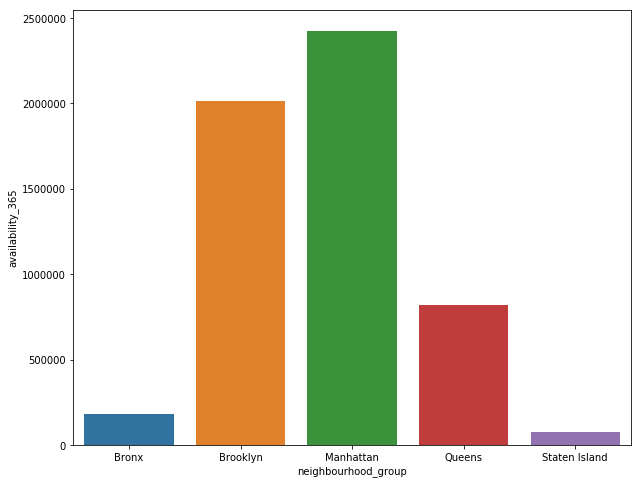

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(a.index,a['availability_365'])

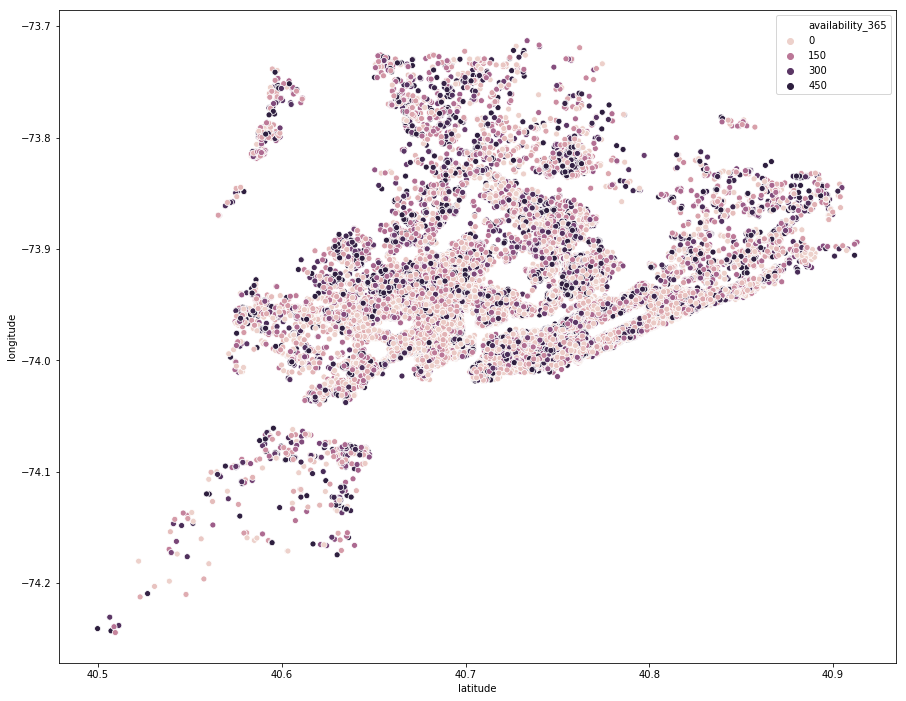

In [31]:
# plotting the data based on the availability of the rooms 
plt.figure(figsize=(15,12))
sns.scatterplot(df['latitude'],df['longitude'],hue=df['availability_365'])

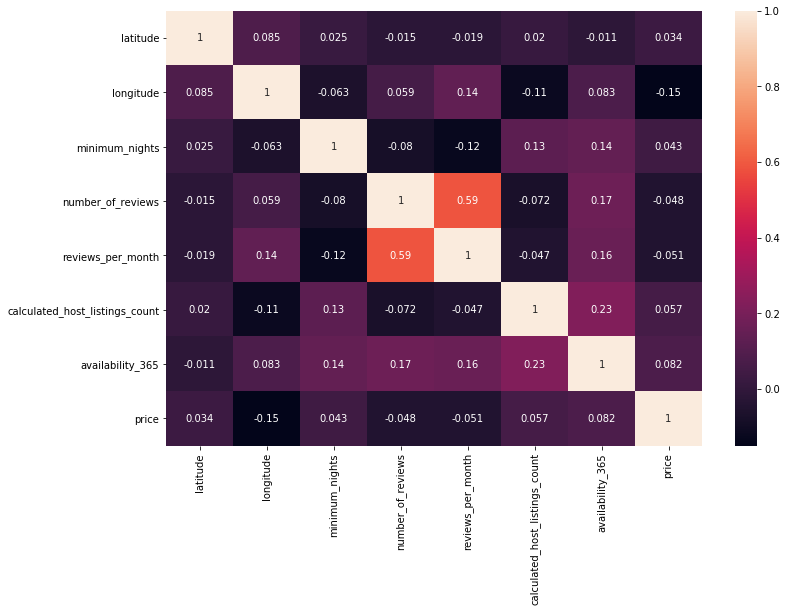

In [32]:
# correlation plot 
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(method='pearson'),annot = True)

In [33]:
# Create basic Folium  map
city_map = folium.Map(location=[42.3125,-71.0875], 
                       tiles = "Stamen Toner",
                      zoom_start = 11)

# Add data for heatmp 

data_heatmap = df[['latitude','longitude']]
data_heatmap = data.dropna(axis=0, subset=['latitude','longitude'])
data_heatmap = [[row['latitude'],row['longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(city_map)
city_map.save('_map1.html')

# Plot!
city_map

In [34]:
# Shows the correlation of availability of rooms

avail_corr=data.corr()['availability_365']
avail_high=avail_corr[abs(avail_corr)>0.1]
avail_high.drop('availability_365',inplace=True)
avail_high=pd.DataFrame(avail_high)

Text(0, 0.5, 'Correlation')

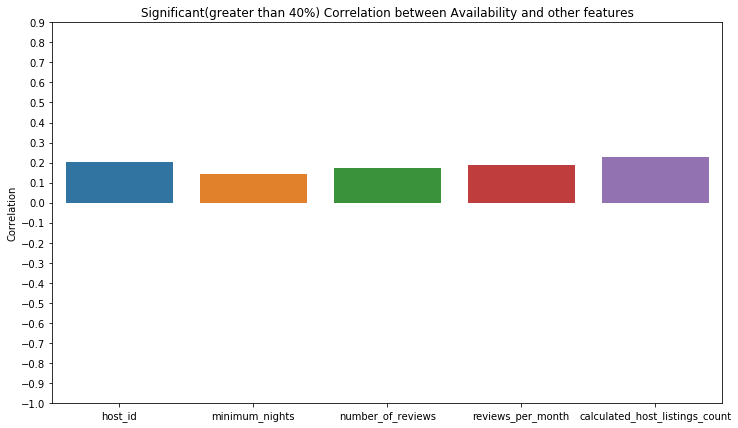

In [35]:
#Plotting the correlation of availability of rooms vs other features using barplot

import numpy as np
plt.figure(figsize=(12,7))
sns.barplot(x=avail_high.index,y=avail_high['availability_365'])
plt.yticks(np.arange(-1, 1, step=0.1))
plt.title('Significant(greater than 40%) Correlation between Availability and other features')
plt.ylabel('Correlation')

In [36]:
from wordcloud import WordCloud 

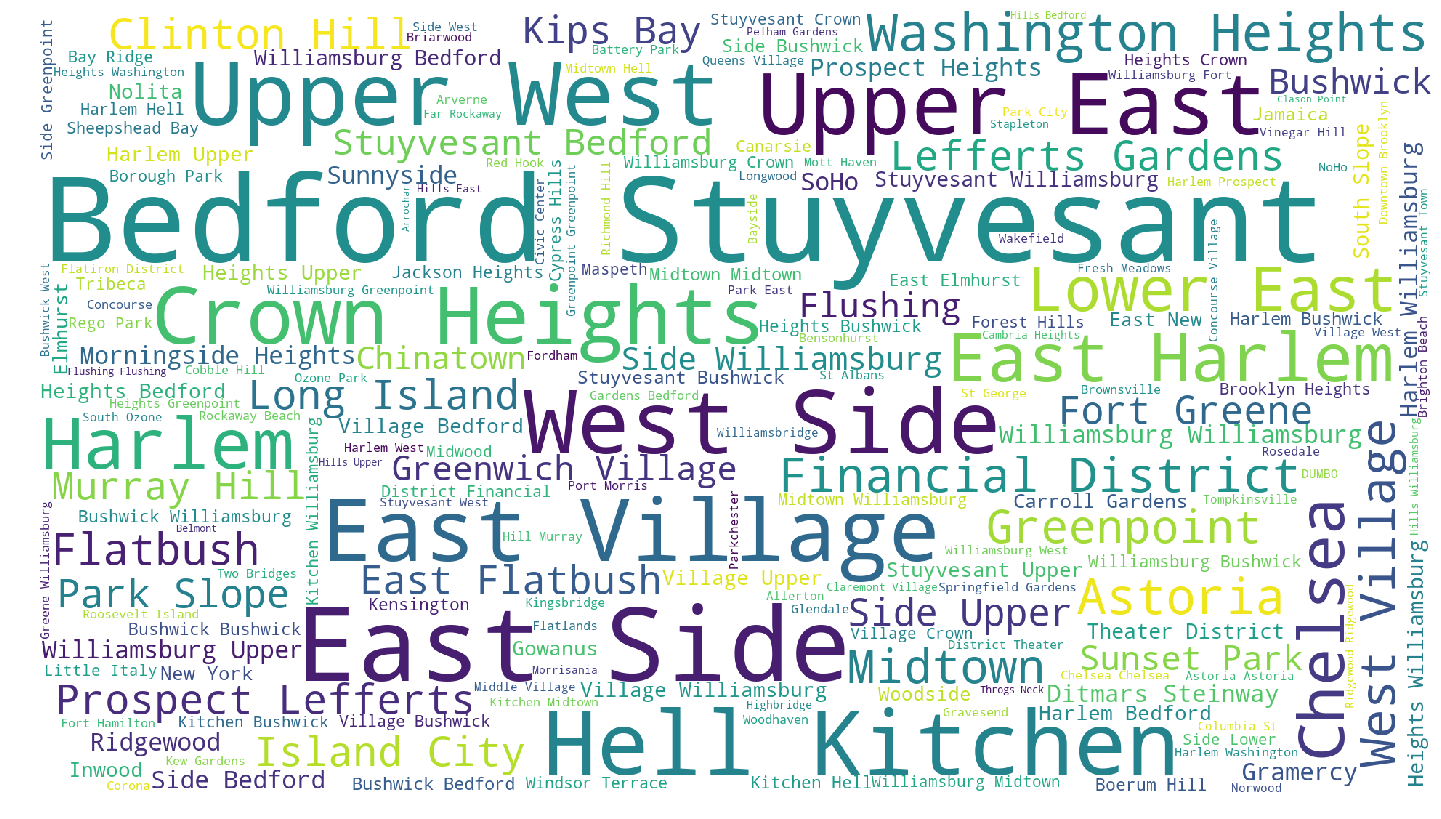

In [37]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()